#### Visualization of configs' performances over different inner seeds

- Evaluated on 3 outer seeds on BBOB 2D FIDs {1, 8, 20}
- 10 inner seeds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

In [2]:
OUTPUT_PATH = "/scratch/hpc-prf-intexml/tklenke/repos/dacboenv/smac3_output_piecewise_2"

In [3]:
# Read logs and create df

runs = [p for p in Path(OUTPUT_PATH).rglob("runhistory.json") if p.parent.parent.name.endswith("outer")]
json_dfs = []

for run in runs:
    
    with open(run) as f:
        data = json.load(f)
    
    tmp = pd.json_normalize(data["data"])
    tmp["source"] = run

    json_dfs.append(tmp)

In [4]:
df = pd.concat(json_dfs)
df["source"] = df["source"].astype(str)
df["source"] = df["source"].apply(lambda x: x.split("/")[-3])

In [ ]:
from ioh import get_problem, ProblemClass

best_1 = get_problem(1, 0, 2, ProblemClass.BBOB).optimum.y
best_8 = get_problem(8, 0, 2, ProblemClass.BBOB).optimum.y
best_20 = get_problem(20, 0, 2, ProblemClass.BBOB).optimum.y

def get_regret(row):
    if "_1_outer" in row["source"]:
        return abs(row["cost"] - best_1)
    elif "_8_outer" in row["source"]:
        return abs(row["cost"] - best_8)
    elif "_20_outer" in row["source"]:
        return abs(row["cost"] - best_20)
    else:
        return None

df["regret"] = df.apply(get_regret, axis=1)
df["log_regret"] = df["regret"].map(lambda x: np.log(x + 1e-10))

/tmp/ipykernel_4095110/1614868227.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4095110/1614868227.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4095110/1614868227.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4095110/1614868227.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4095110/1614868227.py:14: UserWarning: set_ticklabels() should only be used with a fi

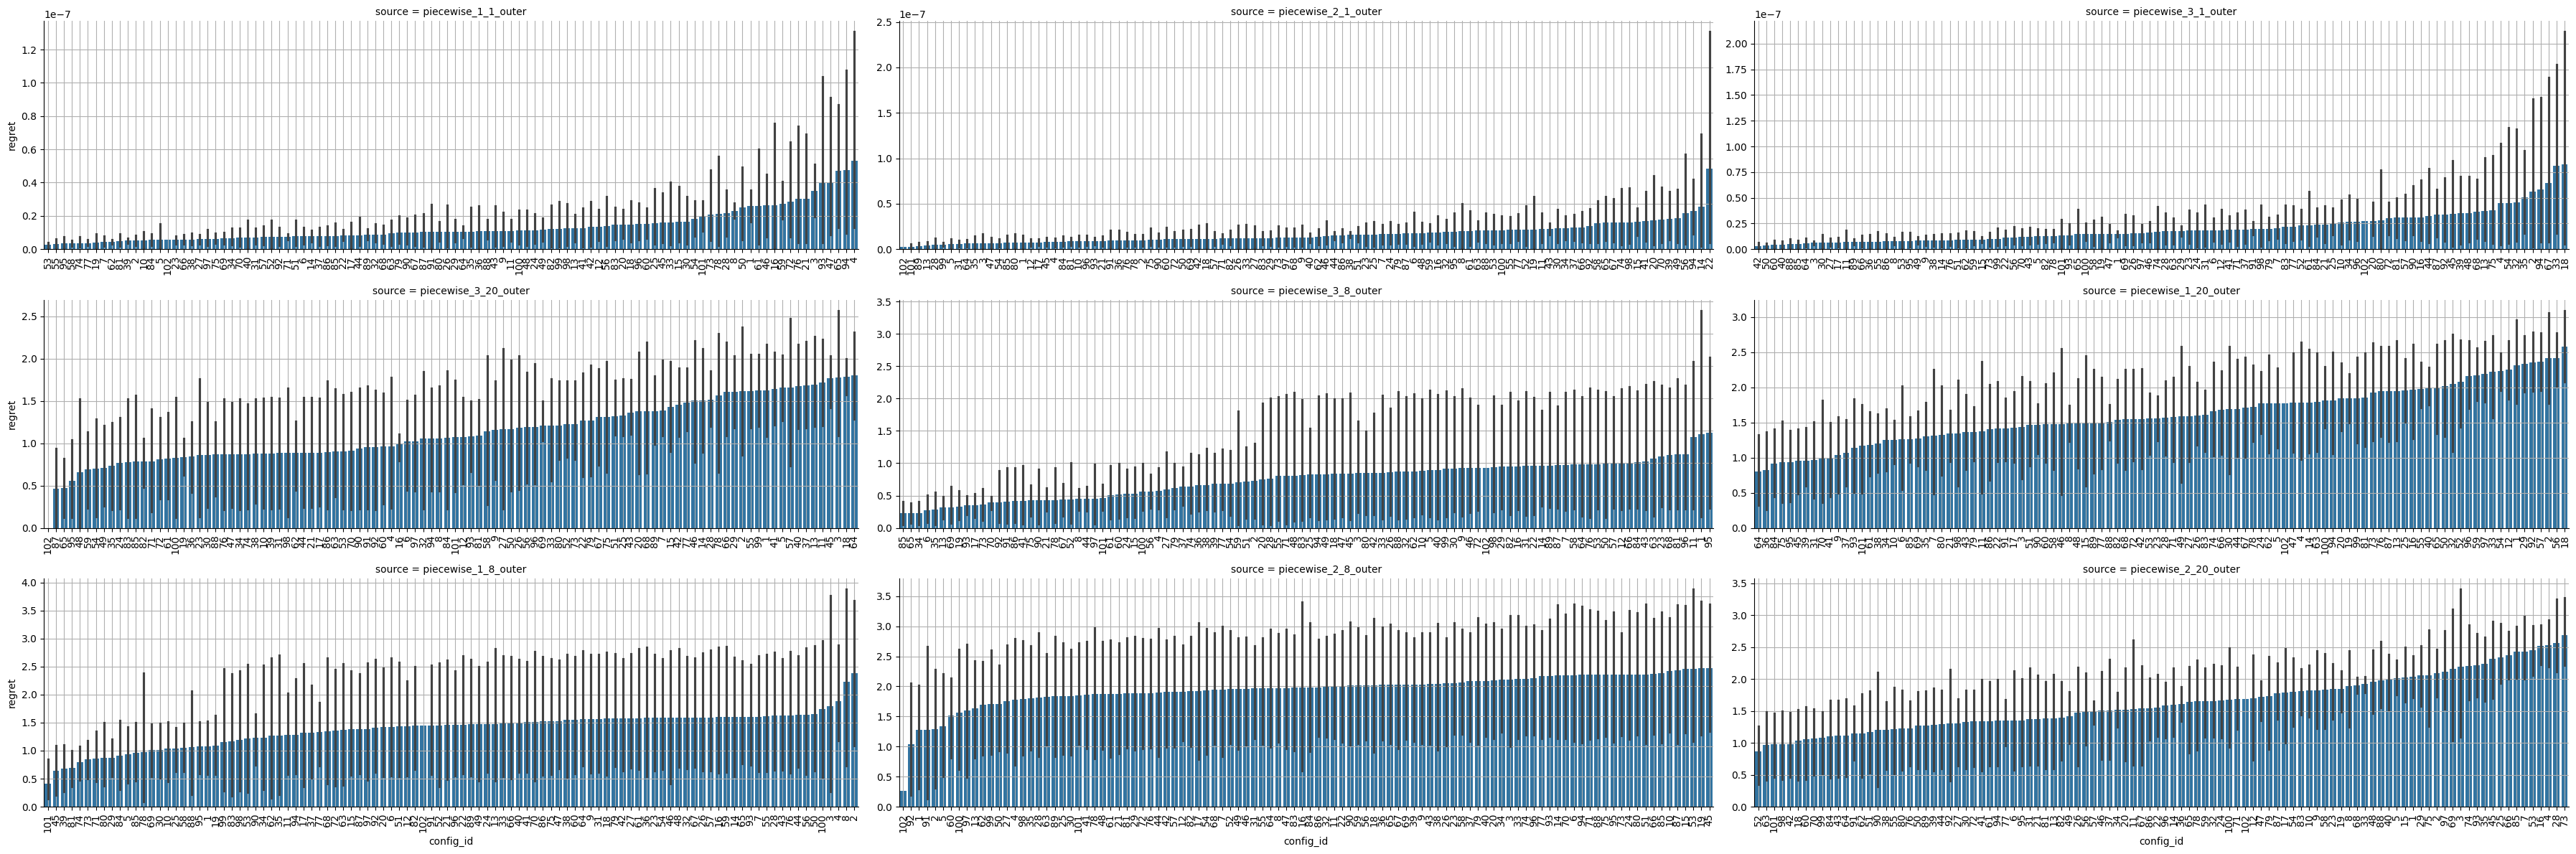

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def barplot_sorted(data, x, y, **kwargs):
    # compute ordering (low -> high) for this facet's subset
    order = data.groupby(x)[y].mean().sort_values().index.tolist()
    # call seaborn with that order
    sns.barplot(data=data, x=x, y=y, order=order, **kwargs)

g = sns.FacetGrid(df, col="source", col_wrap=3, sharey=False, sharex=False, height=4, aspect=3)
g.map_dataframe(barplot_sorted, x="config_id", y="regret")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True)

plt.tight_layout()
plt.show()
